<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_12/Class_013_CNN_cifar_10_augmentation_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras.preprocessing import image

In [2]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Img_Size = 32

170498071/170498071 [==============================] - 7s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [3]:
# Y_test

In [4]:
Y_test = Y_test.ravel()
Y_train = Y_train.ravel()

In [5]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)



# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=80))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [6]:
print(Y_train.shape)
print(X_train.shape)

(50000, 10)
(50000, 32, 32, 3)


In [7]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
#r = model.fit(X_train, Y_train, epochs=15, batch_size=32)
r = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), batch_size=10, epochs=50)

Epoch 1/50
5000/5000 [==============================] - 31s 5ms/step - loss: 1.4451 - accuracy: 0.4814 - val_loss: 1.3315 - val_accuracy: 0.5406
Epoch 2/50
5000/5000 [==============================] - 22s 4ms/step - loss: 1.1254 - accuracy: 0.6051 - val_loss: 1.2641 - val_accuracy: 0.5685
Epoch 3/50
5000/5000 [==============================] - 23s 5ms/step - loss: 0.9882 - accuracy: 0.6543 - val_loss: 1.3189 - val_accuracy: 0.5461
Epoch 4/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.8949 - accuracy: 0.6890 - val_loss: 0.9663 - val_accuracy: 0.6651
Epoch 5/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.8208 - accuracy: 0.7158 - val_loss: 0.8220 - val_accuracy: 0.7231
Epoch 6/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.7641 - accuracy: 0.7362 - val_loss: 0.8606 - val_accuracy: 0.7054
Epoch 7/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.7139 - accuracy: 0.7534 - val_loss: 0.8316 - val_ac

C

In [8]:

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


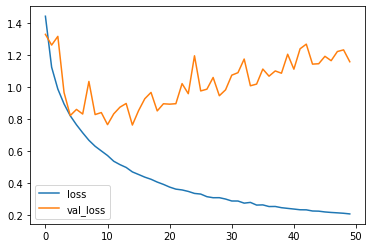

In [9]:

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


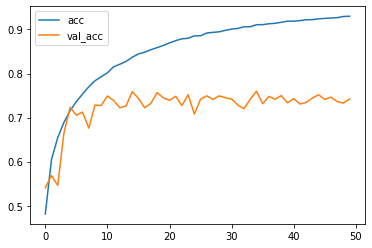

In [10]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.9299 - accuracy: 0.7022 - val_loss: 0.8067 - val_accuracy: 0.7500
Epoch 2/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.8238 - accuracy: 0.7289 - val_loss: 0.7650 - val_accuracy: 0.7570
Epoch 3/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.7860 - accuracy: 0.7387 - val_loss: 0.7312 - val_accuracy: 0.7671
Epoch 4/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.7387 - accuracy: 0.7531 - val_loss: 0.7519 - val_accuracy: 0.7606
Epoch 5/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.7211 - accuracy: 0.7569 - val_loss: 0.7660 - val_accuracy: 0.7617
Epoch 6/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.6979 - accuracy: 0.7648 - val_loss: 0.6891 - val_accuracy: 0.7819
Epoch 7/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.6906 - accuracy: 0.7667 - val_loss: 0.7623 -

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
ynew = model.predict_classes(X_test)
print(ynew)

In [ ]:
N_test = len(ynew)

In [ ]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")
#print(y_resp)

In [ ]:
# model.predict(X_test)

In [ ]:
# (model.predict(X_test)[0] > 0.5).astype("int32")

In [ ]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

In [ ]:
#Y_test[-2,:]

In [ ]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [ ]:
#target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))